In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import widgets
import seaborn as sn
from ipywidgets import widgets
from matplotlib import pyplot
import matplotlib.patches as mpatches
pd.set_option('max_columns', None)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics



In [2]:
train = pd.read_csv(r'C:\Users\ADESOBA OLAMIDE\Desktop\HAMOYE\STAGE 2\energydata_complete.csv')

In [3]:
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
train.shape

(19735, 29)

In [7]:
train = train.drop(["date","lights"],axis=1)

In [8]:
train.isna().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
corr = train.corr()
corr

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


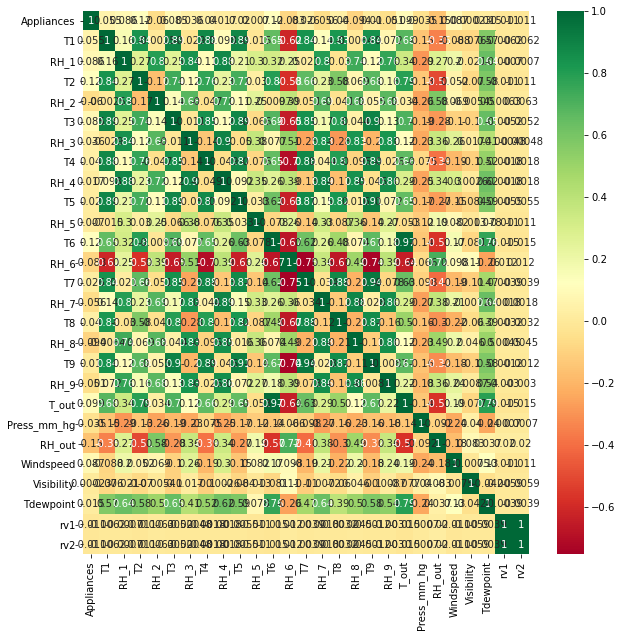

In [10]:
highest_corr_features = corr.index[abs(corr["Appliances"])>0.0]
plt.figure(figsize=(10,10))
g = sn.heatmap(train[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
pd.DataFrame(abs(corr["Appliances"])).sort_values(by='Appliances', ascending=False)

,Appliances
Appliances,1.000000
RH_out,0.152282
T2,0.120073
T6,0.117638
T_out,0.099155
RH_8,0.094039
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
RH_6,0.083178


In [12]:
def features_plot(df,target):
    features = [c for c in df.columns if (df[c].dtype == 'float64' or df[c].dtype == 'int64') and c != target]
    
    if df[target].dtype != 'float64' and df[target].dtype != 'int64':
        return 'error: target not a continous value'
    
    def plot_feature(column):
        plt.plot(df[column], df[target], '.')
        plt.xlabel(column)
        plt.ylabel('target')

    dropdown_menu = [k for k in features]

    return widgets.interact(plot_feature, column=dropdown_menu);

In [13]:
features_plot(train,'Appliances')

interactive(children=(Dropdown(description='column', options=('T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', …

<function __main__.features_plot.<locals>.plot_feature(column)>

In [14]:
def features_his(df):
    features = [c for c in df.columns if (df[c].dtype == 'float64' or df[c].dtype == 'int64')]
    
    
    def plot_feature(column):
        sn.histplot(x=df[column])

    dropdown_menu = [k for k in features]

    return widgets.interact(plot_feature, column=dropdown_menu);

In [15]:
features_his(train)

interactive(children=(Dropdown(description='column', options=('Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', …

<function __main__.features_his.<locals>.plot_feature(column)>

feature = train.drop(["Appliances"],axis = 1)
target = train["Appliances"]

In [16]:
feature = train["T2"].values.reshape(-1,1)
target = train["T6"]

In [17]:
X_train, X_test, y_train, y_true = train_test_split(feature,target, test_size=0.3,random_state=42)

In [18]:
pipe = Pipeline([('scaler',MinMaxScaler() ),
                      ('regressor', LinearRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

In [ ]:
pipe = Pipeline([("std_scaler", MinMaxScaler()),("lasso_reg", Lasso(alpha=0.001))])
pipe.fit(X_train,y_train)

In [ ]:
pipe = Pipeline([("std_scaler",MinMaxScaler()),("poly_reg", PolynomialFeatures(degree = 3)),('regressor', LinearRegression())])
pipe.fit(X_train,y_train)

In [19]:
y_pred = pipe.predict(X_test)

In [20]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table["coef"] = pipe['regressor'].coef_

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
coef_table.sort_values(by="coef")

In [21]:
explained_variance=metrics.explained_variance_score(y_true, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
mse=metrics.mean_squared_error(y_true, y_pred) 
median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
r2=metrics.r2_score(y_true, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.6428
r2:  0.6428
MAE:  2.8229
MSE:  13.1792
RMSE:  3.6303


In [22]:
rss = np.sum(np.square(y_true - y_pred))
rss

78033.97179739829